# numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

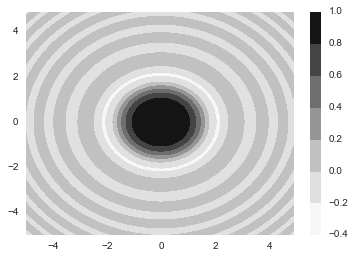

In [2]:
np.random.seed(0)

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)#, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.colorbar(h)

In [3]:
xx_df = pd.DataFrame(xx)
yy_df = pd.DataFrame(yy)

xx_df_drop_duplicated = xx_df.drop_duplicates()
print(len(xx_df), len(yy_df))
print((xx_df_drop_duplicated == yy_df.T.drop_duplicates()).T.drop_duplicates())
xx_df_drop_duplicated

100 100
      0
0  True


0    1    2    3    4    5    6    7    8    9  ...    90   91   92   93  \
0 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 ...   4.0  4.1  4.2  4.3   

    94   95   96   97   98   99  
0  4.4  4.5  4.6  4.7  4.8  4.9  

[1 rows x 100 columns]

In [4]:
xx_sp, yy_sp = np.meshgrid(x, y, sparse=True)
pd.DataFrame(xx_sp == yy_sp.T).sum(axis=1), pd.DataFrame(xx_sp == x).sum(axis=1)

(0    100
 dtype: int64, 0    100
 dtype: int64)

In [5]:
x, y = np.meshgrid([1,2,3,4], [5,6,7])
x_sp, y_sp = np.meshgrid([1,2,3,4], [5,6,7], sparse=True)
pd.concat(
    [pd.DataFrame(x), pd.DataFrame(y), pd.DataFrame(x + y)], axis=1)

x, y, z = np.meshgrid([1,2,3,4], [5,6,7], [8, 9])
x_sp, y_sp, z_sp = np.meshgrid([1,2,3,4], [5,6,7], [8,9], sparse=True)
pd.concat(
    [pd.Panel(x), pd.Panel(y), pd.Panel(z), pd.Panel(x + y + z)], axis=1)

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 16 (major_axis) x 2 (minor_axis)
Items axis: 0 to 2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 1

In [6]:
[(v) for l, v in pd.Panel(y).iteritems()]

[   0  1
 0  5  5
 1  5  5
 2  5  5
 3  5  5,    0  1
 0  6  6
 1  6  6
 2  6  6
 3  6  6,    0  1
 0  7  7
 1  7  7
 2  7  7
 3  7  7]

In [7]:
pd.concat(
    [pd.DataFrame(x_sp), pd.DataFrame(y_sp.T), pd.DataFrame(x_sp + y_sp)])

ValueError: Must pass 2-d input

In [17]:
x_sp

array([[[1],
        [2],
        [3],
        [4]]])

In [18]:
y_sp.T

array([[[5, 6, 7]]])

In [19]:
x_sp + y_sp

array([[[ 6],
        [ 7],
        [ 8],
        [ 9]],

       [[ 7],
        [ 8],
        [ 9],
        [10]],

       [[ 8],
        [ 9],
        [10],
        [11]]])

In [15]:
[pd.DataFrame(x_sp), pd.DataFrame(y_sp.T), pd.DataFrame(x_sp + y_sp)]

ValueError: Must pass 2-d input

TypeError: Input z must be a 2D array.

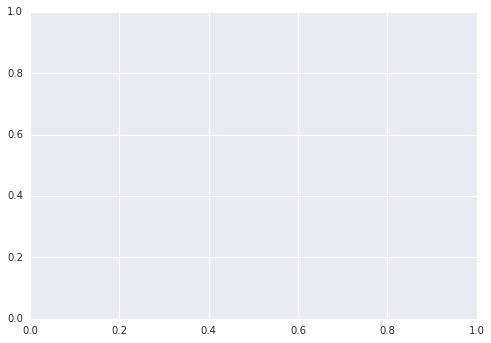

In [20]:
contourf = plt.contourf(x, y, x + y)
plt.colorbar(contourf)

In [21]:
ary = np.array([1,2,3,4,5,6,7,8]).reshape(2,2,2).T
ary

array([[[1, 5],
        [3, 7]],

       [[2, 6],
        [4, 8]]])

In [22]:
ary.ravel()

array([1, 5, 3, 7, 2, 6, 4, 8])

In [23]:
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.c_.html
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.r_.html
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.concatenate.html
#
ar1 = np.array(range(6)).reshape(2, 3)
ar2 = np.array(range(1, 7)).reshape(2, 3)

c_ = np.c_[ar1, ar2]
r_ = np.r_[ar1, ar2]
concat_r = np.concatenate([ar1, ar2])
concat_c = np.concatenate([ar1, ar2], axis=1)

pd.DataFrame(c_)

0  1  2  3  4  5
0  0  1  2  1  2  3
1  3  4  5  4  5  6

In [24]:
pd.DataFrame(r_)

0  1  2
0  0  1  2
1  3  4  5
2  1  2  3
3  4  5  6

In [25]:
(pd.DataFrame(r_) == pd.DataFrame(concat_r)).all().sum()

3

In [26]:
(pd.DataFrame(c_) == pd.DataFrame(concat_c)).all().sum()

6

In [9]:
Function	Description
diag	対角要素を抜き出す
dot	内積
trace	対角要素の和
det	行列式
eig	固有値と固有ベクトルへ分解
inv	転置
pinv	ムーア-ペンローズの擬似逆行列
qr	QR分解
svd	SVD分解
solve	Aが正方行列のときAx=bのxを求める
stsq	最小二乗解を計算

SyntaxError: invalid syntax (<ipython-input-9-01ed6ad0e591>, line 1)

In [87]:
a

array([[1, 1],
       [2, 4]])

In [86]:
np.diag(a)

array([1, 4])

In [91]:
a.diagonal()

array([1, 4])

In [89]:
np.dot(a, a)

array([[ 3,  5],
       [10, 18]])

In [90]:
a.dot(a)

array([[ 3,  5],
       [10, 18]])

In [92]:
a @ a

array([[ 3,  5],
       [10, 18]])

In [88]:
np.trace(a)

5

In [93]:
a.trace()

5

In [96]:
np.linalg.det(a)

2.0

In [97]:
np.linalg.eig(a)

(array([ 0.43844719,  4.56155281]), array([[-0.87192821, -0.27032301],
        [ 0.48963374, -0.96276969]]))

In [100]:
np.linalg.inv(a)

array([[ 2. , -0.5],
       [-1. ,  0.5]])

In [106]:
np.linalg.pinv(a)

array([[ 2. , -0.5],
       [-1. ,  0.5]])

In [107]:
np.linalg.qr(a)

(array([[-0.4472136 , -0.89442719],
        [-0.89442719,  0.4472136 ]]), array([[-2.23606798, -4.02492236],
        [ 0.        ,  0.89442719]]))

In [109]:
np.linalg.svd(a)

(array([[-0.28978415, -0.95709203],
        [-0.95709203,  0.28978415]]),
 array([ 4.6708301 ,  0.42818941]),
 array([[-0.47185793, -0.8816746 ],
        [-0.8816746 ,  0.47185793]]))

In [108]:
np.linalg.solve(a, a)

array([[ 1.,  0.],
       [-0.,  1.]])

In [112]:
np.linalg.lstsq(a, a)

(array([[  1.00000000e+00,   3.31004554e-16],
        [  2.75837128e-16,   1.00000000e+00]]),
 array([], dtype=float64),
 2,
 array([ 4.6708301 ,  0.42818941]))

In [98]:
np.invert(a)

array([[-2, -2],
       [-3, -5]])

In [ ]:
"""
x + y = 3
2x + 4y = 10
([[1, 1],      ([[x],     ([[3],
             *         = 
   [2, 4]])    [y]])       [10]])
"""

In [35]:
np.arange(4).reshape(2, 2)

array([[0, 1],
       [2, 3]])

In [40]:
a = np.array([[1, 1], [2, 4]])
b = np.array([[3], [10]])
print(a, "\n"*2, b)

[[1 1]
 [2 4]] 

 [[ 3]
 [10]]


In [53]:
type(a)
?np.ndarray

In [42]:
np.linalg.solve(a, b)

array([[ 1.],
       [ 2.]])

In [45]:
np.linalg.inv(a).dot(b)

array([[ 1.],
       [ 2.]])

In [49]:
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html
np.multiply(np.linalg.inv(a), b)

array([[  6. ,  -1.5],
       [-10. ,   5. ]])

In [46]:
np.linalg.inv(a) @ b

array([[ 1.],
       [ 2.]])

In [47]:
np.matrix(np.linalg.inv(a)) * b

matrix([[ 1.],
        [ 2.]])

In [54]:
a * b

array([[ 3,  3],
       [20, 40]])

In [55]:
a.dot(b)

array([[13],
       [46]])

In [58]:
b.dot(b.T)

array([[  9,  30],
       [ 30, 100]])

In [59]:
b.T.dot(b)

array([[109]])

In [65]:
np.inner(b, b)

array([[  9,  30],
       [ 30, 100]])

In [66]:
np.inner(b.T, b.T)

array([[109]])

In [62]:
outer_ab = np.outer(a, b)
outer_ba = np.outer(b, a)
outer_ab == outer_ba.T

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [63]:
outer_ab

array([[ 3, 10],
       [ 3, 10],
       [ 6, 20],
       [12, 40]])

In [67]:
np.dot(a.T, b)

array([[23],
       [43]])

In [71]:
# ?np.outer
np.outer(np.array(['a', 'b', 'c'], dtype=object), [1, 2, 3])

array([['a', 'aa', 'aaa'],
       ['b', 'bb', 'bbb'],
       ['c', 'cc', 'ccc']], dtype=object)

In [72]:
np.outer(np.array([1,2,3]), [1, 2, 3])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [81]:
np.array([1,2,3]).reshape(3, 1)

array([[1],
       [2],
       [3]])

In [84]:
np.array([1,2,3]).reshape(3, 1).dot(np.array([1,2,3]).reshape(1, 3))

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

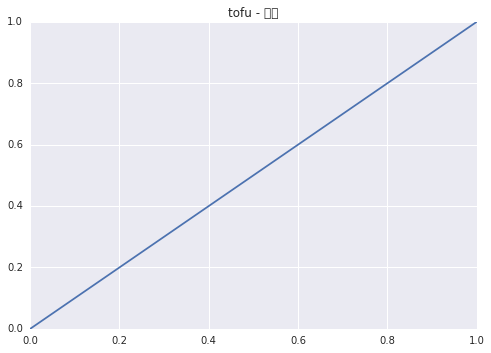

In [27]:
sns.plt.plot([0,1], [0,1]); sns.plt.title('tofu - 豆腐')

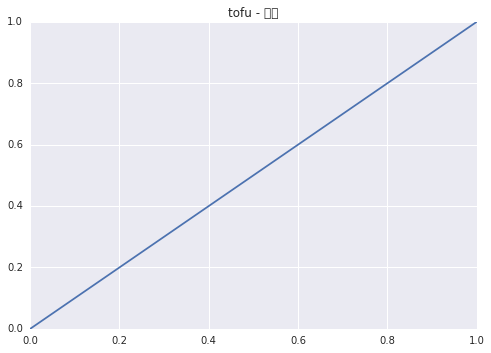

In [28]:
sns.set(font='IPAexGothic')
sns.plt.plot([0,1], [0,1]);  sns.plt.title('tofu - 豆腐')

In [29]:
import matplotlib.font_manager as fm
import pandas as pd
# フォントの一覧
fonts = fm.findSystemFonts()
fonts

/Users/knt/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['/Library/Fonts/Microsoft/Candara Italic.ttf',
 '/Library/Fonts/Farisi.ttf',
 '/Library/Fonts/Microsoft/MS Mincho.ttf',
 '/Library/Fonts/PCmyoungjo.ttf',
 '/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf',
 '/Users/knt/Library/Fonts/Ricty-Bold.ttf',
 '/System/Library/Fonts/SFNSText-Bold.otf',
 '/Library/Fonts/Kokonor.ttf',
 '/Library/Fonts/Microsoft/Tw Cen MT Bold.ttf',
 '/System/Library/Fonts/SFNSDisplay-Light.otf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMBatnanBold.otf',
 '/Library/Fonts/Tahoma Bold.ttf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMMardinBold.otf',
 '/System/Library/Fonts/SFNSDisplay-Medium.otf',
 '/Library/Fonts/Silom.ttf',
 '/Library/Fonts/Microsoft/MS Reference Sans Serif.ttf',
 '/Library/Fonts/AppleMyungjo.ttf',
 '/Library/Fonts/Chalkduster.ttf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMAntioch.otf',
 '/Library/Fonts/Microsoft/Verdana Italic.ttf',
 '/Library/Fonts/Microsoft/Meiryo Bold.ttf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMMalankara.otf',
 '/Library/Fonts/Microsoft/Gulim.t

In [34]:
# len(fonts) => 100以上はあるはず
# データフレームへの詰め込み
l = []
for f in fonts:
    font = fm.FontProperties(fname=f)
    l.append((f, font.get_name(), font.get_family()))
df = pd.DataFrame(l, columns=['path', 'name', 'family'])
# IPAフォントが存在することの確認
df[df['path'].apply(lambda s: 'IPA' in s)]
df

RuntimeError: In FT2Font: Could not set the fontsize

(20, 100)


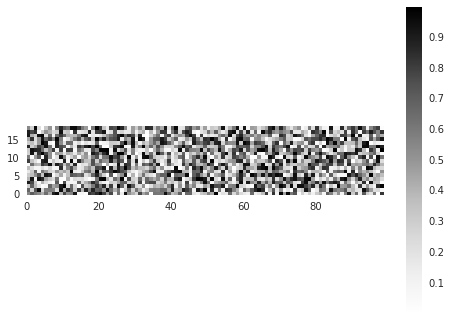

In [31]:
Nx = 100
Ny = 20

a = np.random.rand(Ny, Nx)
print(a.shape)
x = range(Nx)
y = range(Ny)
X, Y = np.meshgrid(x, y)

plt.pcolormesh(X, Y, a)
plt.axis("image")
plt.colorbar()
# plt.tight_layout()
#plt

(1.5, 4.900000000000003)

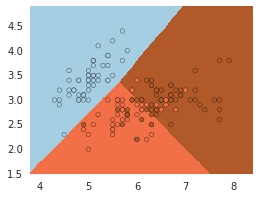

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

# we create an instance of Neighbours Classifier and fit the data.
logreg = linear_model.LogisticRegression(C=1e5).fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

#plt.show()

In [ ]:
name	arguments
beta	(a, b[, size])
binomial	(n, p[, size])
chisquare	(df[, size])
dirichlet	(alpha[, size])
exponential	([scale, size])


## beta
https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%BC%E3%82%BF%E5%88%86%E5%B8%83

In [142]:
np.random.beta?

In [122]:
%%latex
$$
f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
                                                 (1 - x)^{\beta - 1}
$$

<IPython.core.display.Latex object>

### ベータ関数

In [123]:
%%latex
$$
B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}
                             (1 - t)^{\beta - 1} dt.
$$

<IPython.core.display.Latex object>

In [171]:
np.random.beta(a=1, b=1, size=2)

array([ 0.28408624,  0.47506511])

## binomial
https://ja.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83

In [130]:
np.random.binomial?

In [128]:
%%latex
$$
P(N) = \binom{n}{N}p^N(1-p)^{n-N},
$$

<IPython.core.display.Latex object>

In [170]:
np.random.binomial(n=100, p=0.5, size=2)

array([55, 49])

## chisquare
https://ja.wikipedia.org/wiki/%E3%82%AB%E3%82%A4%E4%BA%8C%E4%B9%97%E5%88%86%E5%B8%83

In [162]:
np.random.chisquare?

In [166]:
%%latex
$$
Q = \sum_{i=0}^{\mathtt{df}} X^2_i
$$

<IPython.core.display.Latex object>

In [165]:
%%latex
$$
p(x) = \frac{(1/2)^{k/2}}{\Gamma(k/2)}
                 x^{k/2 - 1} e^{-x/2},
$$

<IPython.core.display.Latex object>

### ガンマ関数

In [164]:
%%latex
$$
\Gamma(x) = \int_0^{-\infty} t^{x - 1} e^{-t} dt.
$$

<IPython.core.display.Latex object>

In [169]:
np.random.chisquare(df=2, size=2)

array([ 3.11450218,  2.90912819])

## dirichlet
https://ja.wikipedia.org/wiki/%E3%83%87%E3%82%A3%E3%83%AA%E3%82%AF%E3%83%AC%E5%88%86%E5%B8%83

In [172]:
np.random.dirichlet?

In [173]:
%%latex
$$
X \approx \prod_{i=1}^{k}{x^{\alpha_i-1}_i}
$$

<IPython.core.display.Latex object>

In [174]:
%%latex
$$
X = \frac{1}{\sum_{i=1}^k{y_i}} (y_1, \ldots, y_n)
$$

<IPython.core.display.Latex object>

In [180]:
np.random.dirichlet(alpha=[1,1,1], size=2)

array([[ 0.58039523,  0.18049816,  0.23910661],
       [ 0.02770379,  0.64163565,  0.33066056]])

## exponential
https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83

In [181]:
np.random.exponential?

In [183]:
%%latex
$$
 f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})
$$

<IPython.core.display.Latex object>

In [192]:
%%latex
$$
\lambda = 1/\beta
$$

<IPython.core.display.Latex object>

In [191]:
np.random.exponential(scale=1.0, size=2)

array([ 0.38809756,  0.20912399])

In [ ]:
## f
https://ja.wikipedia.org/wiki/F%E5%88%86%E5%B8%83

In [193]:
np.random.f?
# dfnum` (degrees of freedom in numerator)` and 
# dfden` (degrees of freedom in denominator)`

In [ ]:
# expression not found

In [194]:
np.random.f(dfnum=2, dfden=3, size=2)

array([ 4.5921271,  6.0671125])

In [ ]:
## gamma
https://ja.wikipedia.org/wiki/%E3%82%AC%E3%83%B3%E3%83%9E%E5%88%86%E5%B8%83

In [195]:
np.random.gamma?

In [196]:
%%latex
$$
p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}
$$

<IPython.core.display.Latex object>

In [202]:
# first argument is shape
np.random.gamma(shape=1.0, scale=2.0, size=2)

array([ 6.56908872,  1.78703692])

In [ ]:
## geometric
https://ja.wikipedia.org/wiki/%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83

In [203]:
np.random.geometric?

In [204]:
%%latex
$$
f(k) = (1 - p)^{k - 1} p
$$

<IPython.core.display.Latex object>

In [207]:
np.random.geometric(p=0.25, size=5)

array([ 1, 10,  2,  1,  2])

## gumbel
https://ja.wikipedia.org/wiki/%E3%82%AC%E3%83%B3%E3%83%99%E3%83%AB%E5%88%86%E5%B8%83

In [211]:
np.random.gumbel?
# scipy.stats.gumbel_l
# scipy.stats.gumbel_r
# scipy.stats.genextreme
# weibull

In [212]:
%%latex
$$
p(x) = \frac{e^{-(x - \mu)/ \beta}}{\beta} e^{ -e^{-(x - \mu)/
          \beta}}
$$

<IPython.core.display.Latex object>

In [209]:
np.random.gumbel(loc=0.0, scale=1.0, size=5)

array([ 1.52374816,  1.21909239, -0.34864738,  1.30255025, -0.18242571])

## hypergeometric
https://ja.wikipedia.org/wiki/%E8%B6%85%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83

In [215]:
np.random.hypergeometric?

In [253]:
%%latex
$$
P(x) = \frac{\binom{m}{n}\binom{N-m}{n-x}}{\binom{N}{n}}
$$

<IPython.core.display.Latex object>

In [241]:
%%latex
$$
0 \le x \le m
,
n+m-N \le x \le n
$$

<IPython.core.display.Latex object>

In [252]:
np.random.hypergeometric(ngood=150, nbad=50, nsample=100, size=5)

array([78, 78, 77, 76, 76])

In [ ]:
## laplace
https://ja.wikipedia.org/wiki/%E3%83%A9%E3%83%97%E3%83%A9%E3%82%B9%E5%88%86%E5%B8%83

In [254]:
np.random.laplace?

In [256]:
%%latex
$$
f(x; \mu, \lambda) = \frac{1}{2\lambda}
                               \exp\left(-\frac{|x - \mu|}{\lambda}\right)
$$

<IPython.core.display.Latex object>

In [257]:
np.random.laplace(loc=0.0, scale=1.0, size=5)

array([ 0.08519469, -0.14605399,  0.45948552,  0.58416639, -0.5740138 ])

## logistic
https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%88%86%E5%B8%83

In [258]:
np.random.logistic?

In [260]:
%%latex
$$
P(x) = P(x) = \frac{e^{-(x-\mu)/s}}{s(1+e^{-(x-\mu)/s})^2}
$$

<IPython.core.display.Latex object>

In [261]:
np.random.logistic(loc=0, scale=1, size=5)

array([ 1.73006169,  0.07923837,  1.69364654,  2.61801514, -0.00910529])

## lognormal
https://ja.wikipedia.org/wiki/%E5%AF%BE%E6%95%B0%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83

In [262]:
np.random.lognormal?

In [263]:
%%latex
$$
p(x) = \frac{1}{\sigma x \sqrt{2\pi}}
                 e^{(-\frac{(ln(x)-\mu)^2}{2\sigma^2})}
$$

<IPython.core.display.Latex object>

In [264]:
np.random.lognormal(mean=0, sigma=1, size=5)

array([ 0.60342456,  1.32460941,  4.77135422,  0.1564132 ,  0.25944637])

## logseries
- https://en.wikipedia.org/wiki/Logarithmic_distribution
- 日本語はない？

In [277]:
np.random.logseries?

In [278]:
%%latex
$$
P(k) = \frac{-p^k}{k \ln(1-p)}
$$

<IPython.core.display.Latex object>

In [279]:
np.random.logseries(p=0.5, size=5)

array([1, 1, 3, 1, 2])

## multinomial
https://ja.wikipedia.org/wiki/%E5%A4%9A%E9%A0%85%E5%88%86%E5%B8%83

In [280]:
np.random.multinomial?

In [283]:
%%latex
$$
f(x_1,\ldots,x_k;n,p_1,\ldots,p_k) = 
\begin
{cases}
{n! \over x_1!\cdots x_k!}p_1^{x_1}\cdots p_k^{x_k} \quad & 
\mbox{when } \sum_{i=1}^k x_i=n 
\\
0 & 
\mbox{otherwise.}
\end
{cases}
$$

<IPython.core.display.Latex object>

In [ ]:
np.random.multinomial(n=, pvals=, size=5)

## multivariate_normal
- https://en.wikipedia.org/wiki/Multivariate_normal_distribution
- https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83#.E5.A4.9A.E5.A4.89.E9.87.8F.E6.AD.A3.E8.A6.8F.E5.88.86.E5.B8.83
    

In [284]:
np.random.multivariate_normal?

In [304]:
%%latex
$$
???
$$

<IPython.core.display.Latex object>

In [303]:
np.random.multivariate_normal(mean=[0, 1], cov=[[1, 0], [0, 1]], size=5)

array([[-0.47681492,  0.66149071],
       [ 0.02377642,  2.54830277],
       [-0.95989893,  1.90386633],
       [-0.94160488, -0.84989032],
       [-0.06047647,  0.29223881]])

## negative_binomial
https://ja.wikipedia.org/wiki/%E8%B2%A0%E3%81%AE%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83

In [305]:
np.random.negative_binomial?

In [306]:
%%latex
$$
P(N;n,p) = \binom{N+n-1}{n-1}p^{n}(1-p)^{N}
$$

<IPython.core.display.Latex object>

In [315]:
np.random.negative_binomial(n=3, p=0.5, size=5)

array([4, 8, 4, 0, 6])

## noncentral_chisquare
- https://ja.wikipedia.org/wiki/%E9%9D%9E%E5%BF%83%E3%82%AB%E3%82%A4%E4%BA%8C%E4%B9%97%E5%88%86%E5%B8%83
- 非心
- https://en.wikipedia.org/wiki/Noncentral_chi-squared_distribution

In [316]:
np.random.noncentral_chisquare?

In [320]:
%%latex
$$
P(x;df,nonc) = \sum^{\infty}_{i=0}
                       \frac{e^{-nonc/2}(nonc/2)^{i}}{i!}
                       \P_{Y_{df+2i}}(x)
$$

<IPython.core.display.Latex object>

In [321]:
np.random.noncentral_chisquare(df=2, nonc=1, size=5)

array([ 0.7826903 ,  0.39724018,  2.10628494,  3.15303285,  1.77351514])

## noncentral_f
- https://en.wikipedia.org/wiki/Noncentral_F-distribution

In [322]:
np.random.noncentral_f?

In [324]:
%%latex
$$
???
$$

<IPython.core.display.Latex object>

In [323]:
np.random.noncentral_f(dfnum=2, dfden=2, nonc=1, size=5)

array([ 1.19224776,  3.47312157,  5.24914716,  0.18250845,  0.74879712])

## normal
https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83

In [325]:
np.random.normal?

In [327]:
%%latex
$$
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
                 e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
$$

<IPython.core.display.Latex object>

In [326]:
np.random.normal(loc=0.0, scale=1.0, size=5)

array([ 1.72200361,  1.91580832,  0.15465406,  1.56988389,  1.42359534])

## pareto
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%AC%E3%83%BC%E3%83%88%E5%88%86%E5%B8%83

In [329]:
np.random.pareto?

In [330]:
%%latex
$$
p(x) = \frac{am^a}{x^{a+1}}
$$

<IPython.core.display.Latex object>

In [ ]:
np.random.pareto(a=, size=5)

## poisson
https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83

In [331]:
np.random.poisson?

In [357]:
%%latex
$$
f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
$$

<IPython.core.display.Latex object>

In [356]:
np.random.poisson(lam=2, size=10)

array([1, 2, 2, 1, 2, 0, 3, 3, 2, 0])

## power
？？

In [358]:
np.random.power?

In [360]:
%%latex
$$
P(x; a) = ax^{a-1}, 0 \le x \le 1, a>0
$$

<IPython.core.display.Latex object>

In [359]:
np.random.power(a=0.5, size=5)

array([ 0.50392877,  0.04684049,  0.00144087,  0.37744684,  0.27361199])

## rayleigh
https://ja.wikipedia.org/wiki/%E3%83%AC%E3%82%A4%E3%83%AA%E3%83%BC%E5%88%86%E5%B8%83

In [364]:
np.random.rayleigh?

In [366]:
%%latex
$$
P(x;scale) = \frac{x}{scale^2}e^{\frac{-x^2}{2 \cdotp scale^2}}
$$

<IPython.core.display.Latex object>

In [365]:
np.random.rayleigh(scale=1.0, size=5)

array([ 2.70600975,  0.46129338,  1.05866746,  1.1758816 ,  0.66072779])

In [378]:
plt.hist?

''

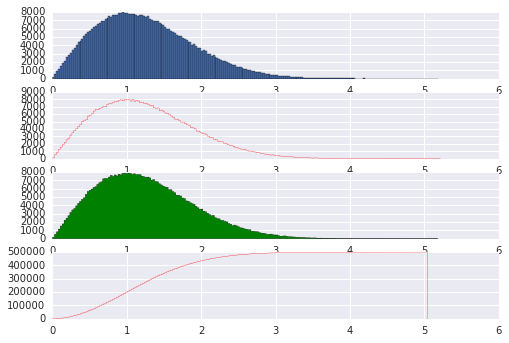

In [382]:
fig, axes = plt.subplots(4)
axes[0].hist(np.random.rayleigh(scale=1.0, size=500000), bins=200)
axes[1].hist(np.random.rayleigh(scale=1.0, size=500000), bins=200, histtype="step", color="red")
axes[2].hist(np.random.rayleigh(scale=1.0, size=500000), bins=200, histtype="stepfilled", color="green")
axes[3].hist(np.random.rayleigh(scale=1.0, size=500000), bins=200, histtype="step", color="red", cumulative=True)


""

In [414]:
rayleigh.ppf(0.01), rayleigh.ppf(0.99), x

(0.14177683769573535,
 3.0348542587702925,
 array([ 0.14177684,  0.17099984,  0.20022285,  0.22944585,  0.25866885,
         0.28789186,  0.31711486,  0.34633787,  0.37556087,  0.40478388,
         0.43400688,  0.46322988,  0.49245289,  0.52167589,  0.5508989 ,
         0.5801219 ,  0.60934491,  0.63856791,  0.66779091,  0.69701392,
         0.72623692,  0.75545993,  0.78468293,  0.81390594,  0.84312894,
         0.87235194,  0.90157495,  0.93079795,  0.96002096,  0.98924396,
         1.01846697,  1.04768997,  1.07691297,  1.10613598,  1.13535898,
         1.16458199,  1.19380499,  1.223028  ,  1.252251  ,  1.281474  ,
         1.31069701,  1.33992001,  1.36914302,  1.39836602,  1.42758902,
         1.45681203,  1.48603503,  1.51525804,  1.54448104,  1.57370405,
         1.60292705,  1.63215005,  1.66137306,  1.69059606,  1.71981907,
         1.74904207,  1.77826508,  1.80748808,  1.83671108,  1.86593409,
         1.89515709,  1.9243801 ,  1.9536031 ,  1.98282611,  2.01204911,
        

- http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.norm.html
- http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.rv_continuous.html

(array([ 0.20597831,  0.53554361,  0.58961291,  0.49692268,  0.37848515,
         0.19052994,  0.12101226,  0.03862093,  0.01287364,  0.00514946]),
 array([ 0.0145884 ,  0.40297881,  0.79136921,  1.17975962,  1.56815003,
         1.95654043,  2.34493084,  2.73332125,  3.12171165,  3.51010206,
         3.89849247]),
 <a list of 1 Patch objects>)

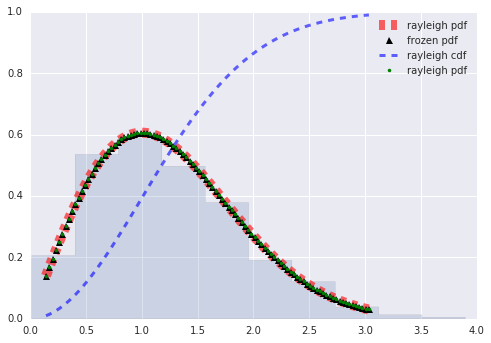

In [423]:
from scipy.stats import rayleigh

fig, ax = plt.subplots(1, 1)

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
# This returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:
rv = rayleigh()
mean, var, skew, kurt = rayleigh.stats(moments='mvsk')
x = np.linspace(rayleigh.ppf(0.01), rayleigh.ppf(0.99), 100)
ax.plot(x, rayleigh.pdf(x), 'r--', lw=10, alpha=0.6, label='rayleigh pdf')
ax.plot(x, rv.pdf(x), 'k^', lw=6, label='frozen pdf')
ax.plot(x, rayleigh.cdf(x), 'b--', lw=3, alpha=0.6, label='rayleigh cdf')
ax.plot(x, rayleigh.pdf(x), 'g.', lw=2, label='rayleigh pdf')
# Check accuracy of cdf and ppf:

vals = rayleigh.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], rayleigh.cdf(vals))
# True

# Generate random numbers: And compare the histogram:
r = rayleigh.rvs(size=1000)
n, bins, patches = ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
n, bins, patches      

## standard_cauchy
- https://ja.wikipedia.org/wiki/%E3%82%B3%E3%83%BC%E3%82%B7%E3%83%BC%E5%88%86%E5%B8%83
- x0 = 0、γ = 1

In [424]:
np.random.standard_cauchy?

In [426]:
%%latex
$$
P(x; x_0, \gamma) = \frac{1}{\pi \gamma \bigl[ 1+
          (\frac{x-x_0}{\gamma})^2 \bigr] }
$$

<IPython.core.display.Latex object>

In [425]:
np.random.standard_cauchy(size=5)

array([-2.40019962, -0.4644643 ,  0.52742126, -0.45076806,  2.80696267])

## standard_exponential
https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83

In [427]:
np.random.standard_exponential?

`standard_exponential` is identical to the exponential distribution
with a scale parameter of 1.

In [428]:
np.random.standard_exponential(size=5)

array([ 0.60078119,  0.3681998 ,  3.48541253,  1.60442092,  0.37735774])

## standard_gamma
https://en.wikipedia.org/wiki/Generalized_gamma_distribution ?

In [431]:
np.random.standard_gamma?

In [432]:
%%latex
$$
p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}
$$

<IPython.core.display.Latex object>

In [433]:
# scale = 1 ?
np.random.standard_gamma(shape=7.5, size=5)

array([ 10.04271151,  12.83452788,   6.77340362,   3.43550584,   5.81463822])

## standard_normal
https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83#.E6.A8.99.E6.BA.96.E6.AD.A3.E8.A6.8F.E5.88.86.E5.B8.83

In [434]:
np.random.standard_normal?

In [435]:
# Draw samples from a standard Normal distribution (mean=0, stdev=1).
np.random.standard_normal(size=5)

array([-0.2389675 ,  0.99376433,  0.23754419,  0.17881443,  0.31359466])

## standard_t
https://ja.wikipedia.org/wiki/T%E5%88%86%E5%B8%83

In [436]:
np.random.standard_t?

In [437]:
%%latex
$$
P(x, df) = \frac{\Gamma(\frac{df+1}{2})}{\sqrt{\pi df}
          \Gamma(\frac{df}{2})}\Bigl( 1+\frac{x^2}{df} \Bigr)^{-(df+1)/2}
$$

<IPython.core.display.Latex object>

In [438]:
np.random.standard_t(df=2, size=5)

array([ 0.85404676,  2.16559892, -2.68894434,  2.27305289, -1.57081979])

## triangular
- https://ja.wikipedia.org/wiki/%E4%B8%89%E8%A7%92%E5%88%86%E5%B8%83
- https://en.wikipedia.org/wiki/Triangular_distribution

In [439]:
np.random.triangular?

In [441]:
%%latex
$$
P(x;l, m, r) = 
\begin{cases}
  \frac{2(x-l)}{(r-l)(m-l)}   & \text{for $l \leq x \leq m$},\\
  \frac{2(m-x)}{(r-l)(r-m)} & \text{for $m \leq x \leq r$},\\
  0                               & \text{otherwise}.
\end{cases}
$$

<IPython.core.display.Latex object>

In [443]:
# `left <= mode <= right`
np.random.triangular(left=2, mode=3, right=5, size=5)

array([ 3.49152131,  3.0465073 ,  2.97680472,  4.01562676,  4.2223051 ])

## uniform
- https://ja.wikipedia.org/wiki/%E9%80%A3%E7%B6%9A%E4%B8%80%E6%A7%98%E5%88%86%E5%B8%83
- https://ja.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E4%B8%80%E6%A7%98%E5%88%86%E5%B8%83

In [445]:
np.random.uniform?

In [447]:
%%latex
$$
p(x) = \frac{1}{b - a}
$$

<IPython.core.display.Latex object>

In [446]:
np.random.uniform(low=0.0, high=2.0, size=5)

array([ 0.46382253,  0.98243351,  0.71326653,  0.9396711 ,  1.96862686])

## vonmises
- https://ja.wikipedia.org/wiki/%E3%83%95%E3%82%A9%E3%83%B3%E3%83%BB%E3%83%9F%E3%83%BC%E3%82%BC%E3%82%B9%E5%88%86%E5%B8%83
- フォン・ミーゼス
- https://en.wikipedia.org/wiki/Von_Mises_distribution

In [450]:
np.random.vonmises?

In [449]:
%%latex
$$
p(x) = \frac{e^{\kappa cos(x-\mu)}}{2\pi I_0(\kappa)}
$$

<IPython.core.display.Latex object>

In [ ]:
# mu: Mode ("center") of the distribution.
np.random.vonmises(mu=, kappa=, size=5)

## wald
- https://ja.wikipedia.org/wiki/%E9%80%86%E3%82%AC%E3%82%A6%E3%82%B9%E5%88%86%E5%B8%83
- ワルド(逆ガウス)分布
- https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

In [451]:
np.random.wald?

In [452]:
%%latex
$$
P(x;mean,scale) = \sqrt{\frac{scale}{2\pi x^3}}e^
                            \frac{-scale(x-mean)^2}{2\cdotp mean^2x}
$$

<IPython.core.display.Latex object>

In [454]:
np.random.wald(mean=1, scale=1, size=5)

array([ 0.57783556,  0.79730746,  0.56055645,  4.75489764,  0.73628504])

## weibull
- https://ja.wikipedia.org/wiki/%E3%83%AF%E3%82%A4%E3%83%96%E3%83%AB%E5%88%86%E5%B8%83
- https://en.wikipedia.org/wiki/Weibull_distribution
- のrelated distribution ?

In [455]:
np.random.weibull?

In [457]:
%%latex
$$
p(x) = \frac{a}
                 {\lambda}(\frac{x}{\lambda})^{a-1}e^{-(x/\lambda)^a},
$$

<IPython.core.display.Latex object>

In [456]:
%%latex
$$
X = (-ln(U))^{1/a}
$$

<IPython.core.display.Latex object>

In [458]:
np.random.weibull(a=1, size=5)

array([ 0.58002483,  0.6534011 ,  0.09482982,  0.54980911,  1.50052021])

## zipf
- https://ja.wikipedia.org/wiki/%E3%82%B8%E3%83%83%E3%83%97%E3%81%AE%E6%B3%95%E5%89%87
- https://en.wikipedia.org/wiki/Zipf%27s_law

In [459]:
np.random.zipf?

In [460]:
%%latex
$$
p(x) = \frac{x^{-a}}{\zeta(a)},
$$

<IPython.core.display.Latex object>

In [462]:
np.random.zipf(a=2, size=5)

array([1, 2, 5, 1, 1])

In [ ]:
name	arguments
beta	(a, b[, size])
binomial	(n, p[, size])
chisquare	(df[, size])
dirichlet	(alpha[, size])
exponential	([scale, size])
f	(dfnum, dfden[, size])
gamma	(shape[, scale, size])
geometric	(p[, size])
gumbel	([loc, scale, size])
hypergeometric	(ngood, nbad, nsample[, size])
laplace	([loc, scale, size])
logistic	([loc, scale, size])
lognormal	([mean, sigma, size])
logseries	(p[, size])
multinomial	(n, pvals[, size])
multivariate_normal	(mean, cov[, size])
negative_binomial	(n, p[, size])
noncentral_chisquare	(df, nonc[, size])
noncentral_f	(dfnum, dfden, nonc[, size])
normal	([loc, scale, size])
pareto	(a[, size])
poisson	([lam, size])
power	(a[, size])
rayleigh	([scale, size])
standard_cauchy	([size])
standard_exponential	([size])
standard_gamma	(shape[, size])
standard_normal	([size])
standard_t	(df[, size])
triangular	(left, mode, right[, size])
uniform	([low, high, size])
vonmises	(mu, kappa[, size])
wald	(mean, scale[, size])
weibull	(a[, size])
zipf	(a[, size])